<a href="https://colab.research.google.com/github/Gustavo-Pinho/p1-predictive/blob/main/Exec_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
pip install ucimlrepo

In [112]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Fetch dataset
seoul_bike_sharing_demand = fetch_ucirepo(id=560)

# Data (as pandas dataframes)
X = seoul_bike_sharing_demand.data.features
y = seoul_bike_sharing_demand.data.targets

# Metadata
print(seoul_bike_sharing_demand.metadata)

# Variable information
print(seoul_bike_sharing_demand.variables)

# Verificando colunas
print("\nColunas em X (features):", X.columns.tolist())
print("Colunas em y (targets):", y.columns.tolist())

# Ajustando o target 'Rented Bike Count' que está em X
target_column = 'Rented Bike Count'
y = X[[target_column]]  # Extraindo o target de X
X = X.drop(columns=[target_column])  # Removendo o target de X

# Transformando o target em binário (alta/baixa demanda com base na mediana)
y_median = y[target_column].median()
y_binary = (y[target_column] > y_median).astype(int)

# Pré-processamento de X
X = X.drop(columns=['Date'])  # Removendo a coluna 'Date'
# Usando apenas as colunas categóricas presentes em X
X = pd.get_dummies(X, columns=['Seasons', 'Holiday'], drop_first=True)
X = X.fillna(X.mean())  # Preenchendo valores ausentes com a média

# Dividindo os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Escalonando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and a

In [107]:
# 1. Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(cm)


Matriz de Confusão:
[[759 126]
 [141 726]]


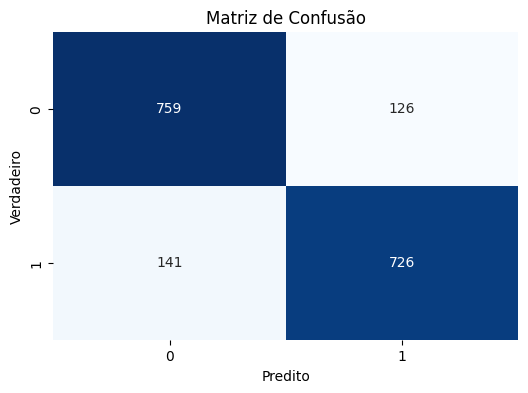

In [108]:
# Visualização da Matriz de Confusão
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()

In [109]:
# 2. Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Baixa Demanda', 'Alta Demanda']))


Relatório de Classificação:
               precision    recall  f1-score   support

Baixa Demanda       0.84      0.86      0.85       885
 Alta Demanda       0.85      0.84      0.84       867

     accuracy                           0.85      1752
    macro avg       0.85      0.85      0.85      1752
 weighted avg       0.85      0.85      0.85      1752



In [110]:
# 3. Importância das Features (coeficientes)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)
print("\nImportância das Features (coeficientes da regressão logística):")
print(coef_df)


Importância das Features (coeficientes da regressão logística):
                  Feature  Coefficient
11         Seasons_Winter    -1.423214
7                Rainfall    -1.173491
1             Temperature     0.899106
0                    Hour     0.832197
2                Humidity    -0.603338
6         Solar Radiation     0.459784
8                Snowfall    -0.317988
9          Seasons_Spring    -0.220782
12     Holiday_No Holiday     0.217156
3              Wind speed    -0.113497
4              Visibility    -0.098010
5   Dew point temperature    -0.055561
10         Seasons_Summer     0.046020


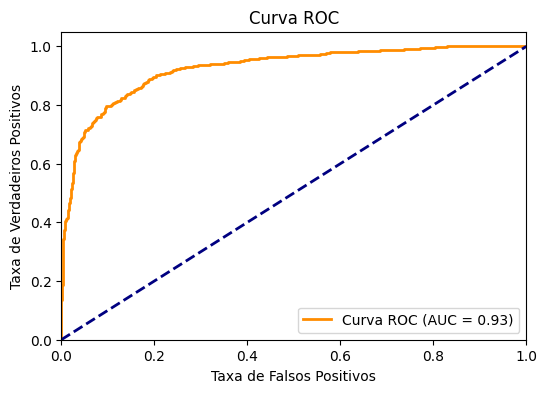

In [111]:
# 4. Curva ROC e AUC
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades para a classe positiva
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [113]:
# Criando e treinando o modelo de regressão logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo de regressão logística no conjunto de teste: {accuracy:.4f}")


Acurácia do modelo de regressão logística no conjunto de teste: 0.8476


Análise: O modelo de regressão logística alcançou uma acurácia de 85% e uma AUC de 0.93 ao classificar a demanda de bicicletas em "Baixa"  e "Alta"  com base na mediana de 'Rented Bike Count'. A AUC de 0.93 reforça a excelente capacidade discriminatória do modelo. As features mais influentes foram fatores climáticos e temporais: Seasons_Winter  e Rainfall  reduzem a demanda, enquanto Temperature  e Hour  a aumentam. Esses resultados sugerem que o modelo captura bem padrões sazonais e meteorológicos, sendo útil para planejamento operacional.

O que Poderia Ter Sido Feito para Melhorar os Resultados: Otimizar parâmetros da regressão logística como penalidade C